In [1]:
import pandas as pd


In [2]:
#reading dataset
data = pd.read_csv('Data/iris_data')

In [3]:
#converting data into dataframes
df = pd.DataFrame(data)

In [4]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
#  Naming the columns
df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

# Preparing dataset

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
df.shape

(149, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
SepalLengthCm    149 non-null float64
SepalWidthCm     149 non-null float64
PetalLengthCm    149 non-null float64
PetalWidthCm     149 non-null float64
Species          149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.groupby('Species').size()

Species
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Visualization

In [12]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda3db14ba8>,
      dtype=object)

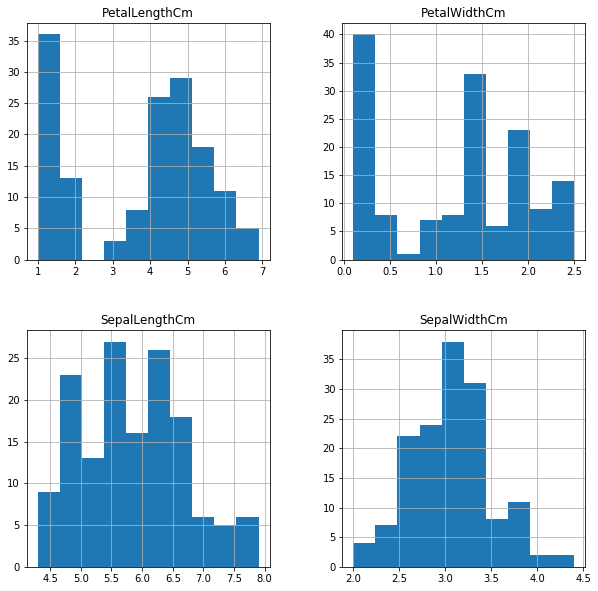

In [13]:
df.hist(figsize=(10,10))

In [14]:
import seaborn as sns

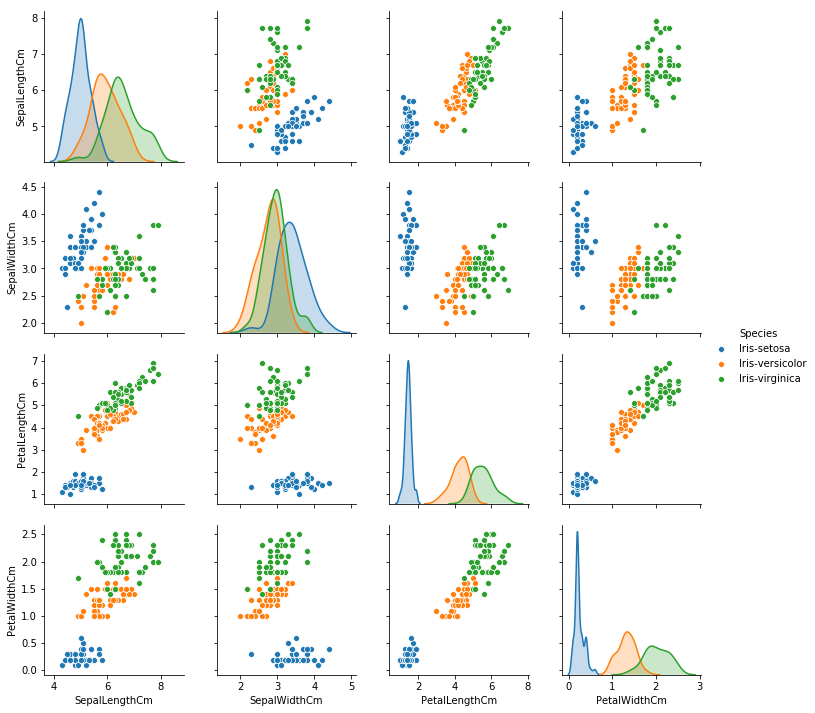

In [15]:
sns.pairplot(df , hue='Species')

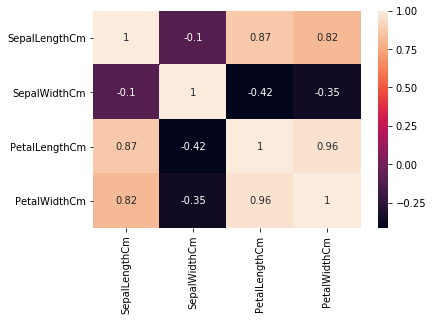

In [16]:

sns.heatmap(data=df.corr(),annot=True)


# Applying Classification Models 

In [17]:
# Spliting of data into training dataset and testing dataset

X = df.drop('Species',axis=1)
y = df['Species']

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.1)

In [19]:
# using Logistic Regression (classification algorithm)

from sklearn.linear_model import LogisticRegression


In [34]:
classifier = LogisticRegression(random_state=2)
classifier.fit(X_train,y_train)

/home/mohini/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mohini/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=2, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
pred = classifier.predict(X_test)
print("prediction : ",pred)


prediction :  ['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']


In [36]:
score = classifier.score(X_test,y_test)
print("Score : ",score)


Score :  1.0


In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


In [31]:
classification_report=classification_report(y_test,pred)
print(classification_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        12

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [32]:
confusion_matrix = confusion_matrix(y_test,pred)
print("confusion_matrix : ",confusion_matrix )


confusion_matrix :  [[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]


In [33]:
accuracy_score = accuracy_score(y_test,pred)
print("accuracy_score : ",accuracy_score)


accuracy_score :  1.0
